In [1]:
import pandas as pd
import numpy as np

In [2]:
# df_train=pd.read_csv('sign_mnist_train.csv')
# df_test=pd.read_csv('sign_mnist_test.csv')
# y_train=df_train['label'].values
# y_test=df_test['label'].values
# df_train.drop('label',axis=1,inplace=True)
# df_test.drop('label',axis=1,inplace=True)
# df_test.head()

In [3]:
# x_train=df_train.values
# x_test=df_test.values
# unique_val = np.array(y_train)
# np.unique(unique_val)

In [4]:
# x_train=np.array(x_train.reshape(-1,28,28,1))
# x_test=np.array(x_test.reshape(-1,28,28,1))

In [5]:
# print(x_train.shape)
# print(x_test.shape)

In [6]:
# from sklearn.preprocessing import LabelBinarizer
# lb_train= LabelBinarizer()
# lb_test=LabelBinarizer()
# y_train=lb_train.fit_transform(y_train)
# y_test=lb_test.fit_transform(y_test)

In [7]:
# print(y_train)
# print(y_test)

In [8]:
import matplotlib.pyplot as plt
# plt.imshow(x_train[10].reshape(28,28),cmap='gray')

In [9]:
# x_train=x_train/255
# x_test=x_test/255

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = r'cnn_alphabet_dataset\train'
valid_path = r'cnn_alphabet_dataset\valid'

img_size = (64, 64)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    shear_range=0.1,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(rescale=1./255)

train = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'
)

val = val_datagen.flow_from_directory(
    valid_path,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'
)

Found 1512 images belonging to 26 classes.
Found 144 images belonging to 26 classes.


In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [ ]:
batch_size = 128
num_classes = 26
epochs = 100

In [13]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(64, 64, 3) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.20))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.20))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(num_classes, activation = 'softmax'))

In [14]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])


In [15]:
history = model.fit(train, validation_data=val, epochs=100)

Epoch 1/100
48/48 [==============================] - 6s 117ms/step - loss: 3.2575 - accuracy: 0.0476 - val_loss: 3.2616 - val_accuracy: 0.0556
Epoch 2/100
48/48 [==============================] - 6s 119ms/step - loss: 3.2343 - accuracy: 0.0529 - val_loss: 3.2340 - val_accuracy: 0.0833
Epoch 3/100
48/48 [==============================] - 5s 109ms/step - loss: 3.2050 - accuracy: 0.0668 - val_loss: 3.1941 - val_accuracy: 0.0278
Epoch 4/100
48/48 [==============================] - 5s 105ms/step - loss: 3.1548 - accuracy: 0.0886 - val_loss: 3.1065 - val_accuracy: 0.1736
Epoch 5/100
48/48 [==============================] - 5s 101ms/step - loss: 3.0846 - accuracy: 0.1157 - val_loss: 2.9967 - val_accuracy: 0.1042
Epoch 6/100
48/48 [==============================] - 5s 99ms/step - loss: 2.9788 - accuracy: 0.1290 - val_loss: 2.9032 - val_accuracy: 0.1597
Epoch 7/100
48/48 [==============================] - 5s 102ms/step - loss: 2.7758 - accuracy: 0.1839 - val_loss: 2.5975 - val_accuracy: 0.2708


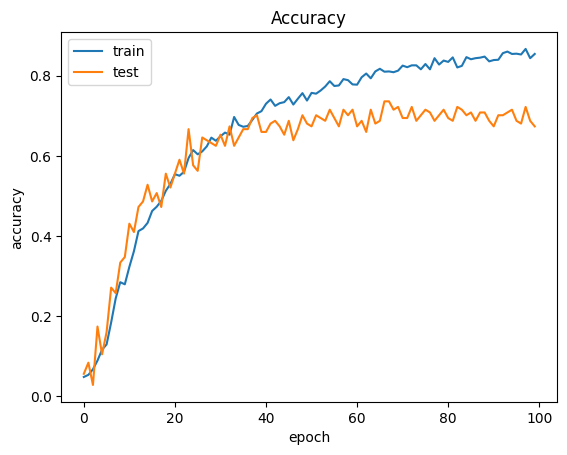

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [ ]:
model.save('CNN_alphabet.h5')

1/1 [==============================] - 0s 15ms/step


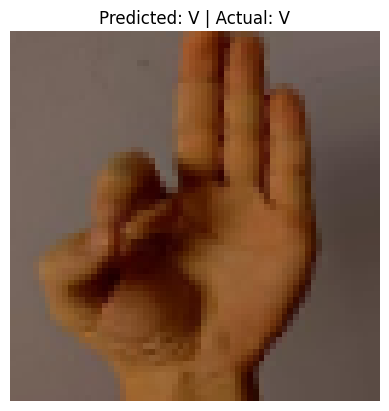

Random index: 4
Probabilities: [[2.0895778e-04 9.3480367e-03 1.4416478e-05 3.6999112e-04 4.5956600e-05
  1.9137794e-04 1.7417293e-05 5.9368808e-06 5.0022564e-09 8.8466142e-05
  8.9359228e-06 3.8418140e-05 3.2588187e-06 5.7928506e-03 2.6442613e-06
  9.3738228e-05 1.2497357e-05 1.4761332e-04 8.0801925e-09 1.3933136e-04
  4.2926351e-04 9.8125309e-01 3.0204936e-07 3.1817180e-07 1.7865787e-03
  6.2977949e-07]]
Max index: 21
Predicted letter: V
Actual label index: 21
Actual letter: V


In [ ]:
import cv2
import random
from tensorflow.keras.utils import img_to_array

alphabet=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']

def classify(image):
    if image.max() > 1:
        image = image.astype("float") / 255.0
    image = cv2.resize(image, (64, 64))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    proba = model.predict(image)
    idx = np.argmax(proba)
    return idx, proba

images, labels = next(train)

rand_index = random.randint(0, len(images) - 1)

img = images[rand_index]
label = labels[rand_index]

idx, proba = classify(img)
true_idx = np.argmax(label)
true_letter = alphabet[true_idx]

plt.imshow(img)
plt.title(f"Predicted: {alphabet[idx]} | Actual: {true_letter}")
plt.axis('off')
plt.show()

print(f"Random index: {rand_index}")
print("Probabilities:", proba)
print("Max index:", idx)
print("Predicted letter:", alphabet[idx])
print("Actual label index:", true_idx)
print("Actual letter:", true_letter)

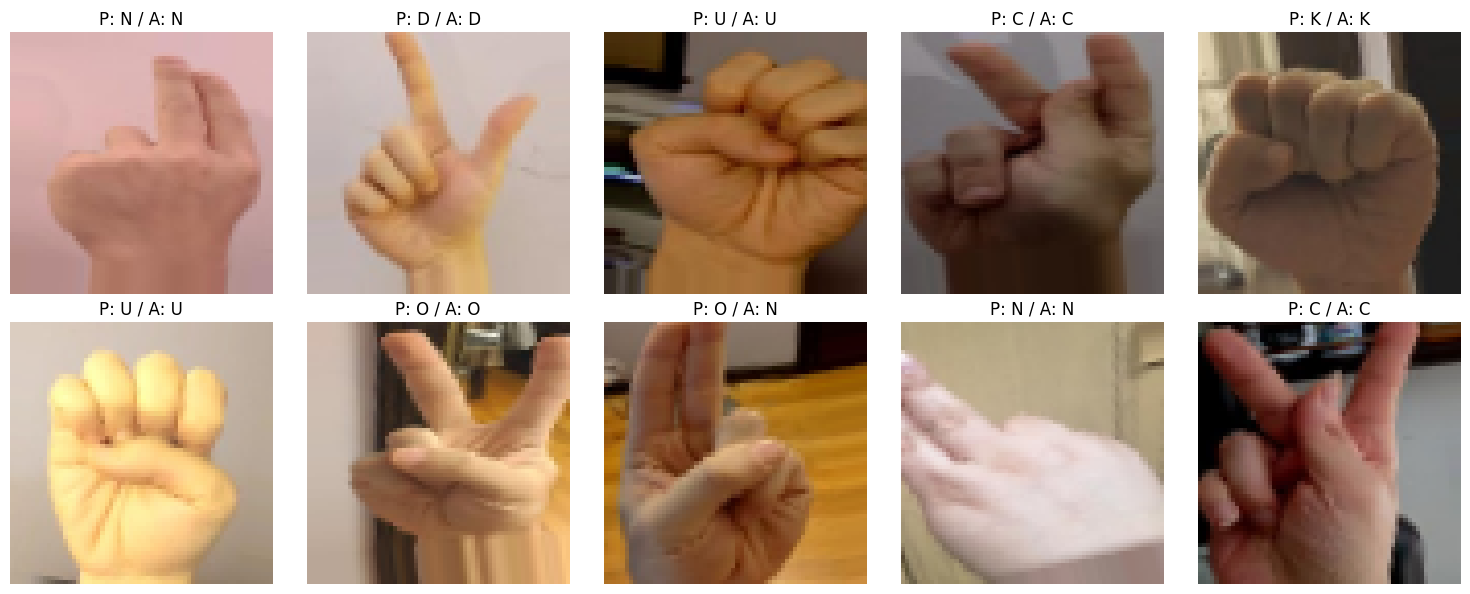

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
from tensorflow.keras.utils import img_to_array

def classify(image):
    if image.max() > 1:
        image = image.astype("float") / 255.0
    image = cv2.resize(image, (64, 64))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    proba = model.predict(image, verbose=0)
    idx = np.argmax(proba)
    return idx, proba

alphabet = list("ABCDEFGHIJKLMNOPQRSTUVWXY")  # 26 ตัว

sample_indices = random.sample(range(len(images)), 10)

fig, axs = plt.subplots(2, 5, figsize=(15, 6))

for ax, idx in zip(axs.flat, sample_indices):
    img = images[idx]
    label = labels[idx]
    pred_idx, _ = classify(img)
    true_idx = np.argmax(label)

    pred_letter = alphabet[pred_idx]
    true_letter = alphabet[true_idx]

    ax.imshow(img)
    ax.set_title(f"P: {pred_letter} / A: {true_letter}")
    ax.axis('off')

plt.tight_layout()
plt.show()
